<a href="https://colab.research.google.com/github/YinhaoHe/Python-AI-teaching/blob/master/Classify_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classifying handwritten digits is the basic problem of the machine learning and can be solved in many ways here we will implement them by using TensorFlow

**Using Deep learning with tf.keras**

Deep learning is a subpart of machine learning and artificial intelligence which is also known as deep neural network this networks capable of learning unsupervised from provided data which is unorganized or unlabeled. today, we will implement a neural network in TensorFlow to classify handwritten digit.

**Step 1 :** Importing all dependence

In [6]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 


**Step 2 :** Import data and normalize it

In [7]:
mnist = tf.keras.datasets.mnist 
(x_train,y_train) , (x_test,y_test) = mnist.load_data() 

x_train = tf.keras.utils.normalize(x_train,axis=1) 
x_test = tf.keras.utils.normalize(x_test,axis=1) 


11493376/11490434 [==============================] - 0s 0us/step


**Step 3 :** view data

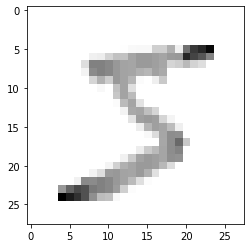

In [8]:
def draw(n): 
	plt.imshow(n,cmap=plt.cm.binary) 
	plt.show() 
	
draw(x_train[0]) 


**Step 4 :** make a neural network and train it

In [9]:
#there are two types of models 
#sequential is most common, why? 

model = tf.keras.models.Sequential() 

model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) 
#reshape 

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) 

model.compile(optimizer='adam', 
			loss='sparse_categorical_crossentropy', 
			metrics=['accuracy'] 
			) 
model.fit(x_train,y_train,epochs=3) 


Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2600 - accuracy: 0.9251
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1054 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0716 - accuracy: 0.9775


**Step 5** : check model accuracy and loss

In [10]:
val_loss,val_acc = model.evaluate(x_test,y_test) 
print("loss-> ",val_loss,"\nacc-> ",val_acc) 


313/313 [==============================] - 0s 1ms/step - loss: 0.0889 - accuracy: 0.9706
loss->  0.08893319964408875 
acc->  0.9706000089645386


**Step 6** ： prediction using model

lable ->  1
prediction ->  1


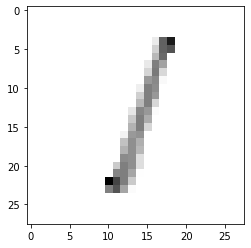

In [11]:
predictions=model.predict([x_test]) 
print('lable -> ',y_test[2]) 
print('prediction -> ',np.argmax(predictions[2])) 

draw(x_test[2]) 
